In [3]:
# add tag 'ignore_cell' to not include cell in README

In [20]:
!jupyter nbconvert \
    --to markdown ./simple_demo.ipynb \
    --TagRemovePreprocessor.remove_cell_tags="['ignore_cell']" \
    --output-dir=./ \
    --output=./README.md


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

optional arguments:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run script troubleshoot

Jupyter command `jupyter-nbconvert` not found.


In [5]:
try:
    import poisson_transform
except:
    print('module not installed')
    print('Did you activate the local environment?')
    print('Did you run `pip install -e . --config-settings editable_mode=strict` in the root directory?')

# Poisson 2D Transform

This is a [poisson equation](https://en.wikipedia.org/wiki/Poisson%27s_equation) in **curved 2d space** [finite difference](https://en.wikipedia.org/wiki/Finite_difference_method) solver.

Many different poisson solvers exist but few provide simple to use solvers for curved-space.

This package provides that in a very simple to use interface.

# How to use

### Install
    pip install poisson_transform

### Use

First you specify the following inputs:

- f: The RHS of poisson's equation (as a function that takes input coordinates and outputs a value). If empty will set `f(x, y)=1`.
- g: the Boundary conditions of poisson's equation. If empty will set BCs to Dirichlet.
  - `g` should be a function that takes in coordinates and returns (a, b, g) for the boundary condition such that `a*u + b*∂u/∂n = g` on ∂Ω (boundary of domain) 
    - For example, returning `(1, 0, 0)` sets `u=0` which is a dirichlet conditions on that point.
    - For example, returning `(0, 1, 0)` sets `∂u/∂n=0` which is a dirichlet conditions on that point.
    - For example, returning `(1, 2, 3)` sets `u + 2*∂u/∂n = 3` on that point.
- Specify the transformation to be used `T_x, T_y` where `x = T_x(ksi)` and `y = T_y(eta)`. `ksi` and `eta` are the identity coordinates: $\xi \in [0, 1]$ and $\eta \in [0, 1]$. If empty then the identity transformation will be used.
  1. To do this, simply obtain the variables `ksi, eta` with the following line `ksi, eta = Transformation.get_ksi_eta()`
  2. Then, define an arbitrary transformation on the unit square `Tx = ksi**2 + 0.75*ksi ; Ty = (1-eta)*(1.25*ksi) + eta*(2.75-ksi)`. This step can be arbitrarily complex and uses `Sympy` under the hood to perform the calculations. See below examples for more complex transformations such as rotated ellipses.
  3. Then, get the `transformation` object to be given to the solver using `transformation = Transformation(ksi, eta, Tx, Ty)`
- Finally, call `solve_and_plot` with the number of point to use for the mesh. 
  - Since the above inputs can be left blank, the simplest use case is `solve_and_plot(Nx=30, Ny=30)` which will solve poisson's equation on the unit square with Dirichlet BCs using a mesh grid of ($30 \times 30$).
  - To provide all the above inputs, simply write `solve_and_plot(Nx=29, Ny=29, transformation=transformation, f=f, g=g)`

See below for example uses.

Note: This package has not been tested extensively. If you find an issue please report it (or make a pull-request if fixed)

# Examples

19:35:29 Warning: both f and g are None. Are you sure this is what you want?
19:35:29 f is None. Setting f=1
19:35:29 g is None. Setting Dirichlet BCs 
19:35:30 Integral: 0.03500889856987609


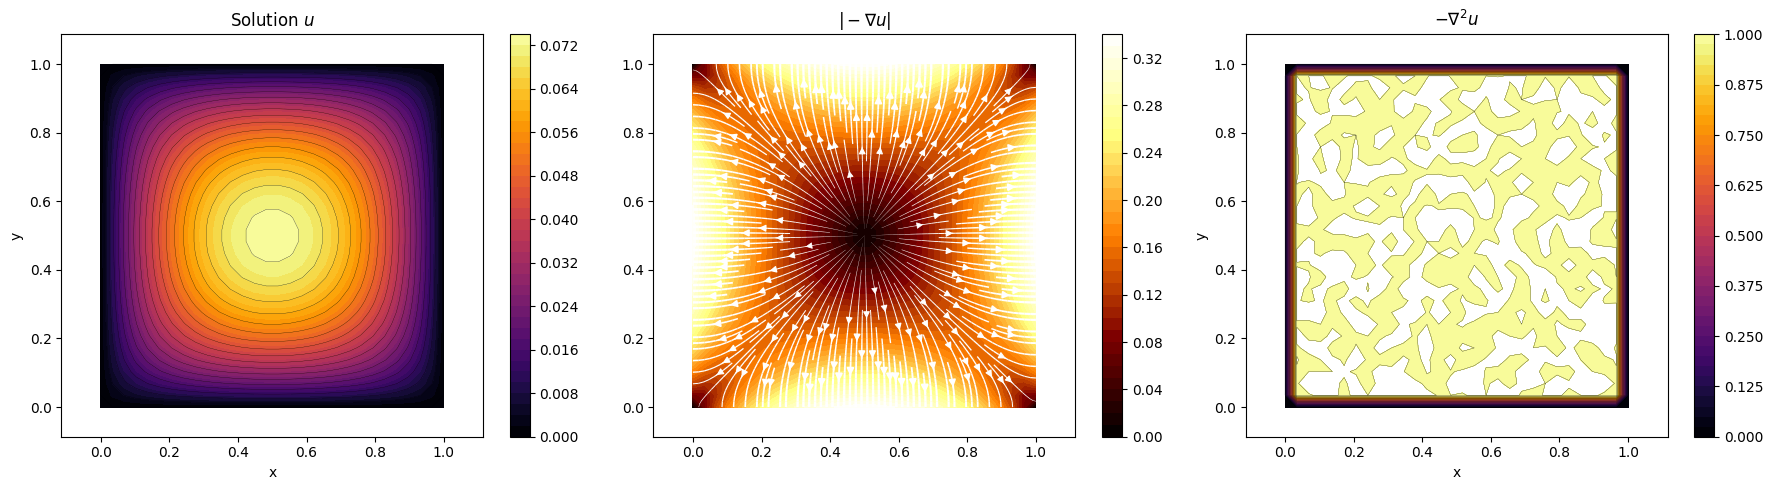

In [6]:
from poisson_transform import solve_and_plot
solve_and_plot(Nx=30, Ny=30)

19:35:32 g is None. Setting Dirichlet BCs 
19:35:34 Integral: 0.06935111999589494


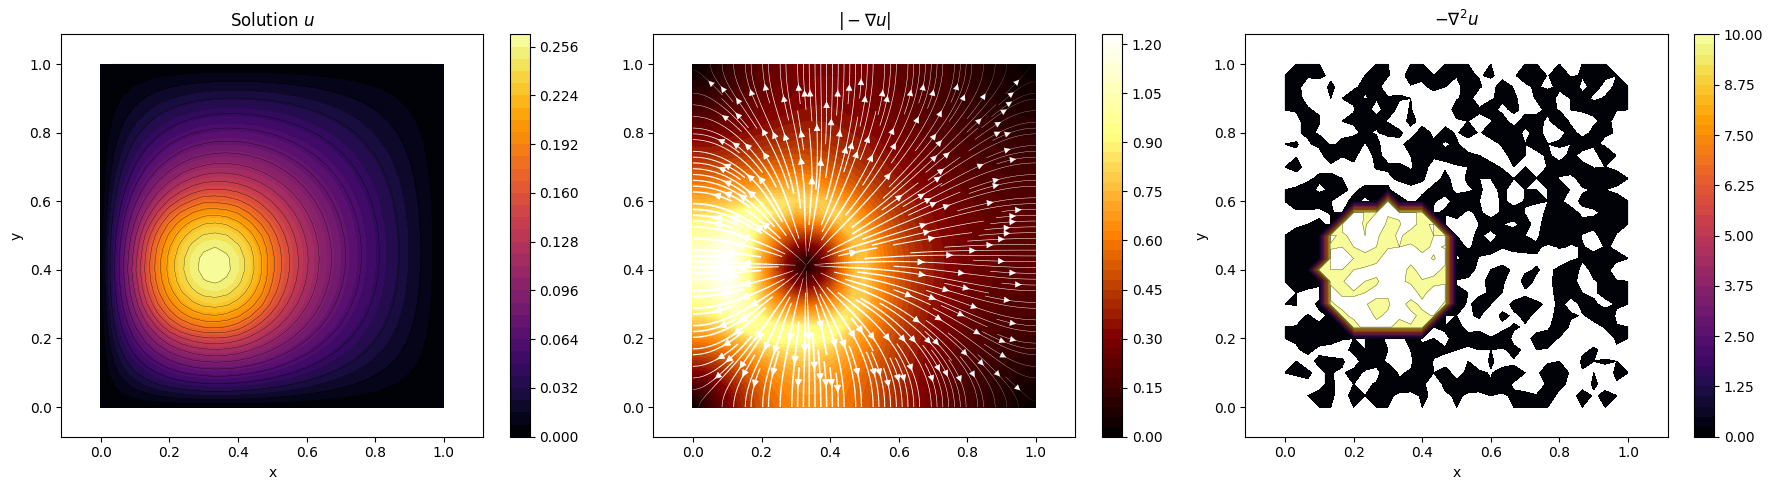

In [7]:
from poisson_transform import solve_and_plot
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    if (x - 0.3)**2 + (y - 0.4)**2 < 0.2**2 :
        return 10
    return 0

solve_and_plot(Nx=31, Ny=31, f=f)

19:35:37 Integral: 0.0832355038593408


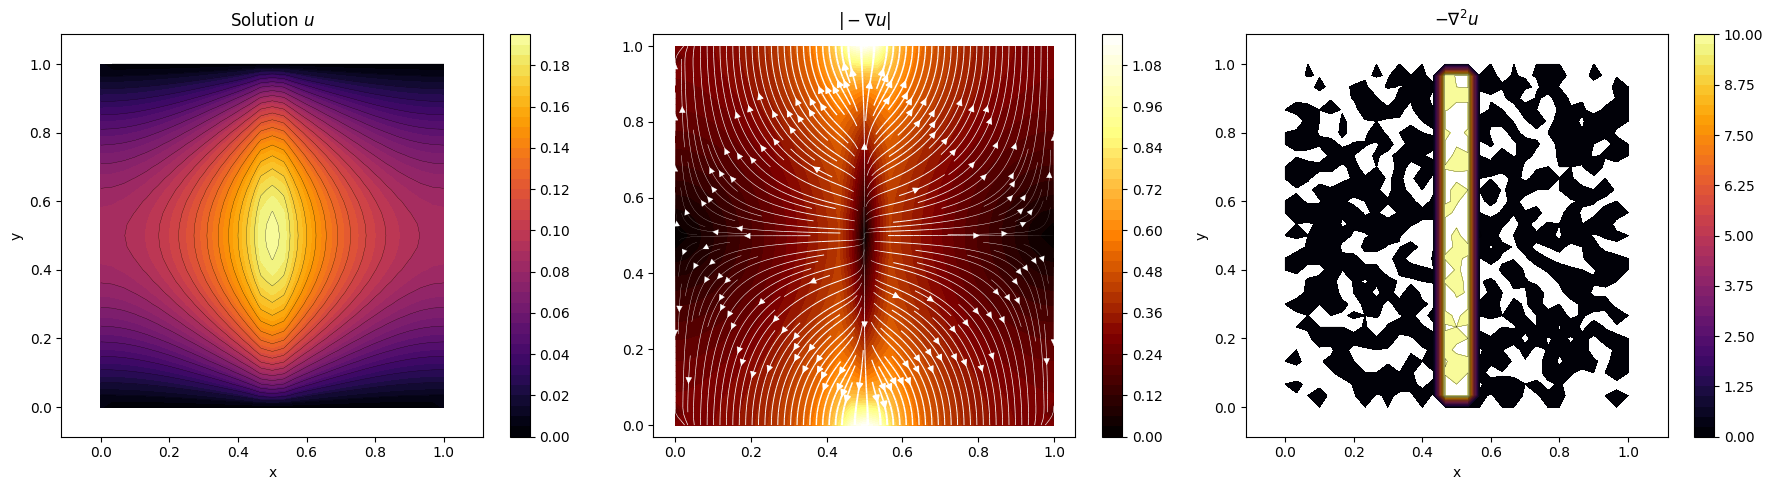

In [8]:
from poisson_transform import solve_and_plot
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    if 0.45 < x < 0.55:
        return 10
    return 0
def g(x, y, ksi, eta):
    """Returns (a, b, g) for the boundary condition a*u + b*∂u/∂n = g on ∂Ω and (1, 0, g) for dirichlet conditions inside the domain)"""
    if ksi == 0:  # left, neumann = 0
        return (0, 1, 0)
    if eta == 1:  # top, dirichlet = 0
        return (1, 0, 0)
    if ksi == 1:  # right, neumann = 0
        return (0, 1, 0)
    if eta == 0:  # bottom, dirichlet = 0
        return (1, 0, 0)

solve_and_plot(Nx=31, Ny=31, f=f, g=g)

19:35:41 Integral: 5.2916463228833726


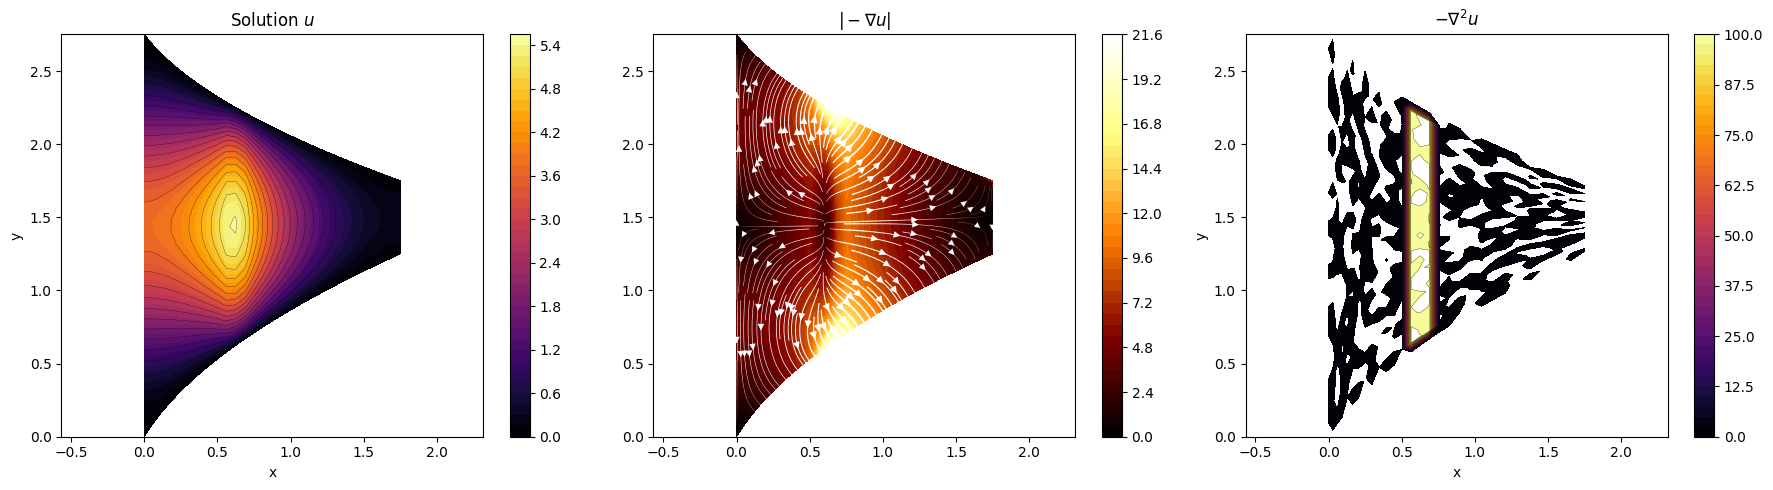

In [9]:
from poisson_transform import Transformation, solve_and_plot, plotGeometry
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    if 0.45 < ksi < 0.55:
        return 100
    return 0
def g(x, y, ksi, eta):
    """Returns (a, b, g) for the boundary condition a*u + b*∂u/∂n = g on ∂Ω and (1, 0, g) for dirichlet conditions inside the domain)"""
    if ksi == 0:  # left, neumann = 0
        return (0, 1, 0)
    if eta == 1:  # top, dirichlet = 0
        return (1, 0, 0)
    if ksi == 1:  # right, neumann = 0
        return (0, 1, 0)
    if eta == 0:  # bottom, dirichlet = 0
        return (1, 0, 0)

ksi, eta = Transformation.get_ksi_eta()
Tx = ksi**2 + 0.75*ksi
Ty = (1-eta)*(1.25*ksi) + eta*(2.75-ksi)
transformation = Transformation(ksi, eta, Tx, Ty)
# plotGeometry(29, 29, transformation)
solve_and_plot(Nx=29, Ny=29, transformation=transformation, f=f, g=g)

19:35:43 Warning: both f and g are None. Are you sure this is what you want?
19:35:43 f is None. Setting f=1
19:35:43 g is None. Setting Dirichlet BCs 
19:35:45 Integral: 0.016063603756651158


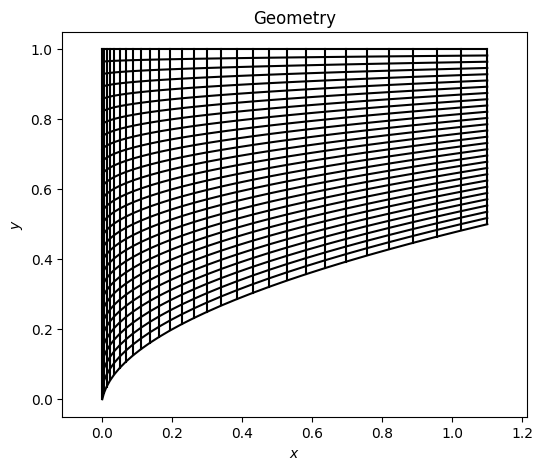

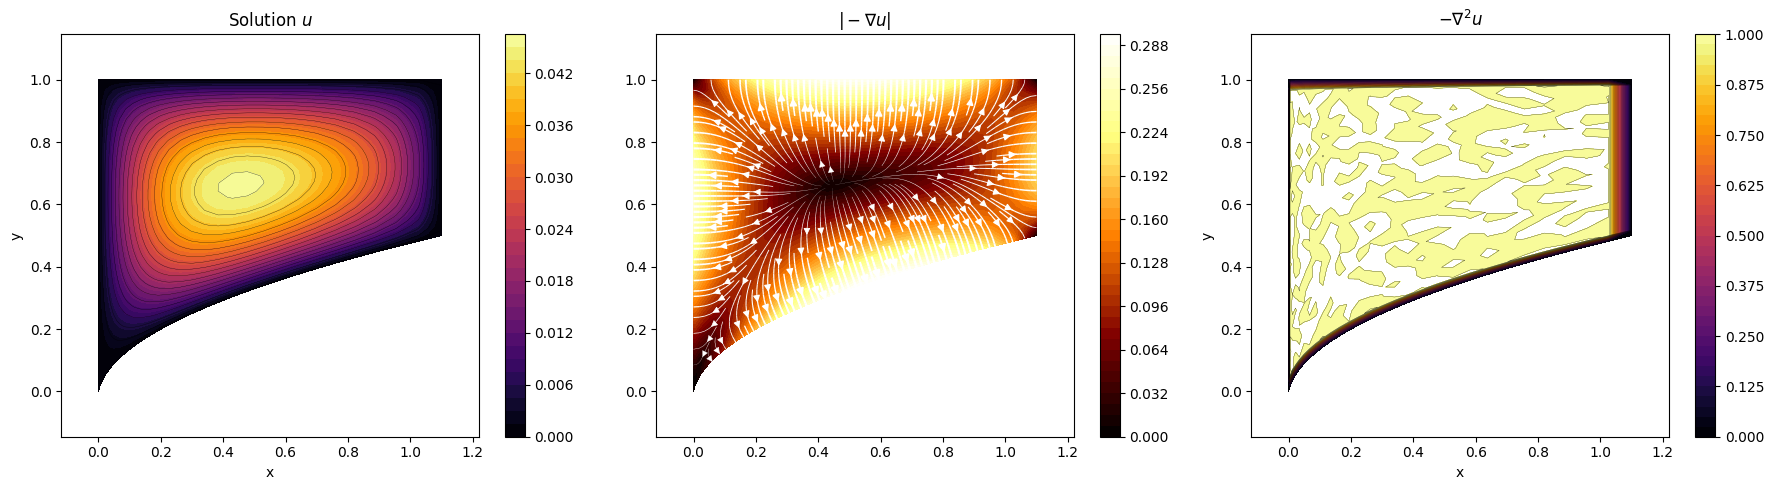

In [10]:
from poisson_transform import Transformation, plotGeometry, solve_and_plot

ksi, eta = Transformation.get_ksi_eta()
Tx = ksi**2 + 0.1*ksi
Ty = 1/2*ksi*(1-eta) + eta
transformation = Transformation(ksi, eta, Tx, Ty)
plotGeometry(Nx=29, Ny=29, transformation=transformation)
solve_and_plot(Nx=29, Ny=29, transformation=transformation)

19:35:48 Integral: 0.021996048708012562


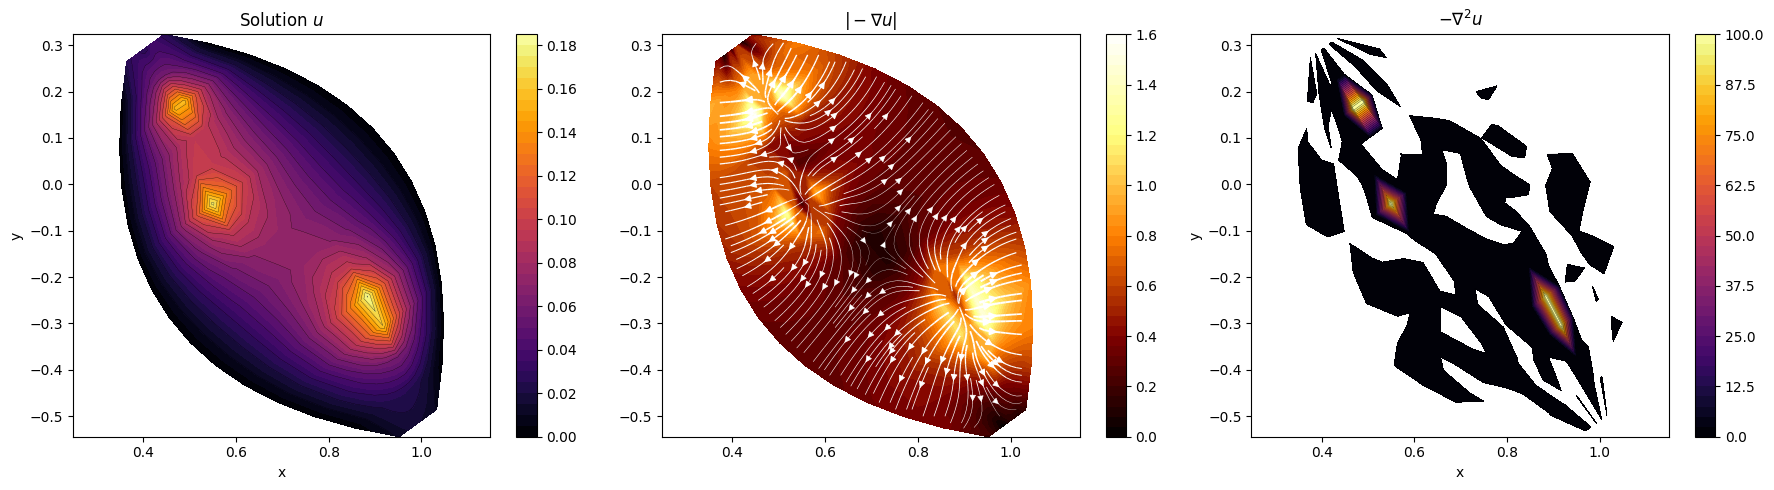

In [11]:
import numpy as np
from poisson_transform import Transformation, solve_and_plot
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    if (0.7 < ksi < 0.8 and 0.6 < eta < 0.7) or (0.3 < ksi < 0.4 and 0.3 < eta < 0.4) or (0.1 < ksi < 0.2 and 0.4 < eta < 0.55):
        return 100
    return 0
def g(x, y, ksi, eta):
    """Returns (a, b, g) for the boundary condition a*u + b*∂u/∂n = g on ∂Ω and (1, 0, g) for dirichlet conditions inside the domain)"""
    if ksi == 0:  # left, neumann = 0
        return (0, 1, 0)
    if ksi == 1:  # right, neumann = 0
        return (0, 1, 0)
    if eta == 1:  # top, dirichlet = 0
        return (1, 0, 0)
    if eta == 0:  # bottom, dirichlet = 0
        return (1, 0, 0)

ksi, eta = Transformation.get_ksi_eta()
Tx = ksi
ellipse_bottom = (ksi-0.5)**2 + 0.2
ellipse_top = 1 - ellipse_bottom
Ty = ellipse_bottom*(1-eta) + ellipse_top*eta
rotate_phi = -1.2*np.pi/4
Tx_rot, Ty_rot = np.cos(rotate_phi)*Tx - np.sin(rotate_phi)*Ty, np.sin(rotate_phi)*Tx + np.cos(rotate_phi)*Ty
solve_and_plot(Nx=15, Ny=15, transformation=Transformation(ksi, eta, Tx_rot, Ty_rot), f=f, g=g, contour_levels=20)

19:35:51 Integral: 0.20123610428427863


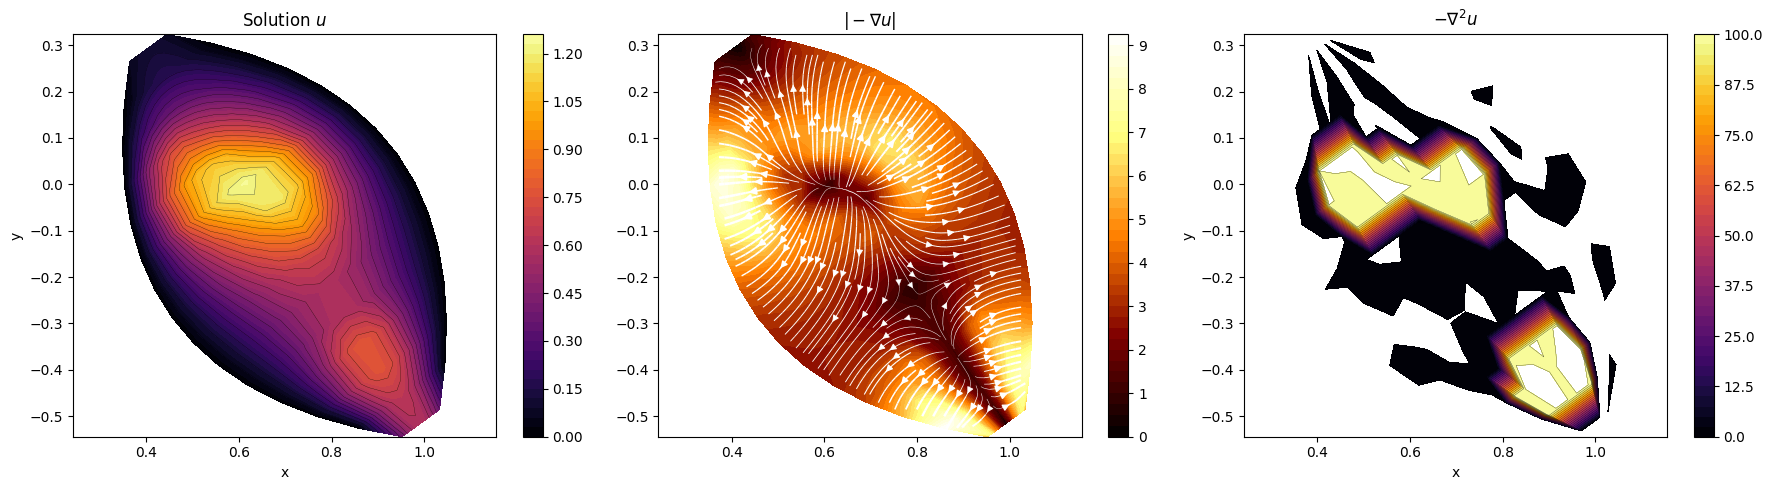

In [12]:
import importlib
import poisson_transform
importlib.reload(poisson_transform)
import numpy as np
from poisson_transform import Transformation, solve_and_plot
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    # centers = ((0.7, 0.6, 0.1), (0.3, 0.3, 0.1), (0.1, 0.4, 0.1))
    centers = ((0.7, 0.0, 0.1), (0.9, -0.4, 0.1), (0.5, 0.0, 0.1))
    if any((x - xc)**2 + (y - yc)**2 < r**2 for xc, yc, r in centers):
        return 100
    return 0
def g(x, y, ksi, eta):
    """Returns (a, b, g) for the boundary condition a*u + b*∂u/∂n = g on ∂Ω and (1, 0, g) for dirichlet conditions inside the domain)"""
    if ksi == 0:  # left, neumann = 0
        return (0, 1, 0)
    if ksi == 1:  # right, neumann = 0
        return (0, 1, 0)
    if eta == 1:  # top, dirichlet = 0
        return (1, 0, 0)
    if eta == 0:  # bottom, dirichlet = 0
        return (1, 0, 0)

ksi, eta = Transformation.get_ksi_eta()
Tx = ksi
ellipse_bottom = (ksi-0.5)**2 + 0.2
ellipse_top = 1 - ellipse_bottom
Ty = ellipse_bottom*(1-eta) + ellipse_top*eta
rotate_phi = -1.2*np.pi/4
Tx_rot, Ty_rot = np.cos(rotate_phi)*Tx - np.sin(rotate_phi)*Ty, np.sin(rotate_phi)*Tx + np.cos(rotate_phi)*Ty
solve_and_plot(Nx=15, Ny=15, transformation=Transformation(ksi, eta, Tx_rot, Ty_rot), f=f, g=g, contour_levels=20)

19:36:06 Integral: 0.46734117404100667


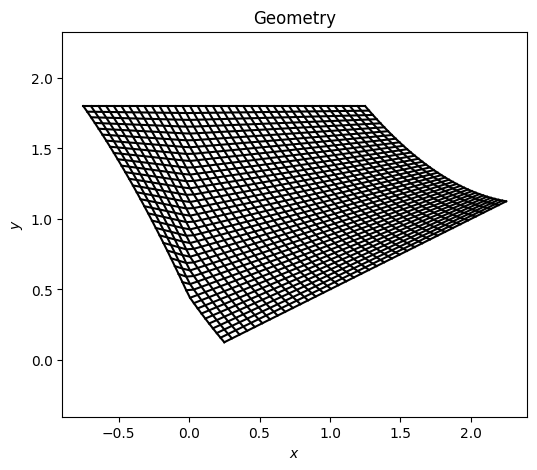

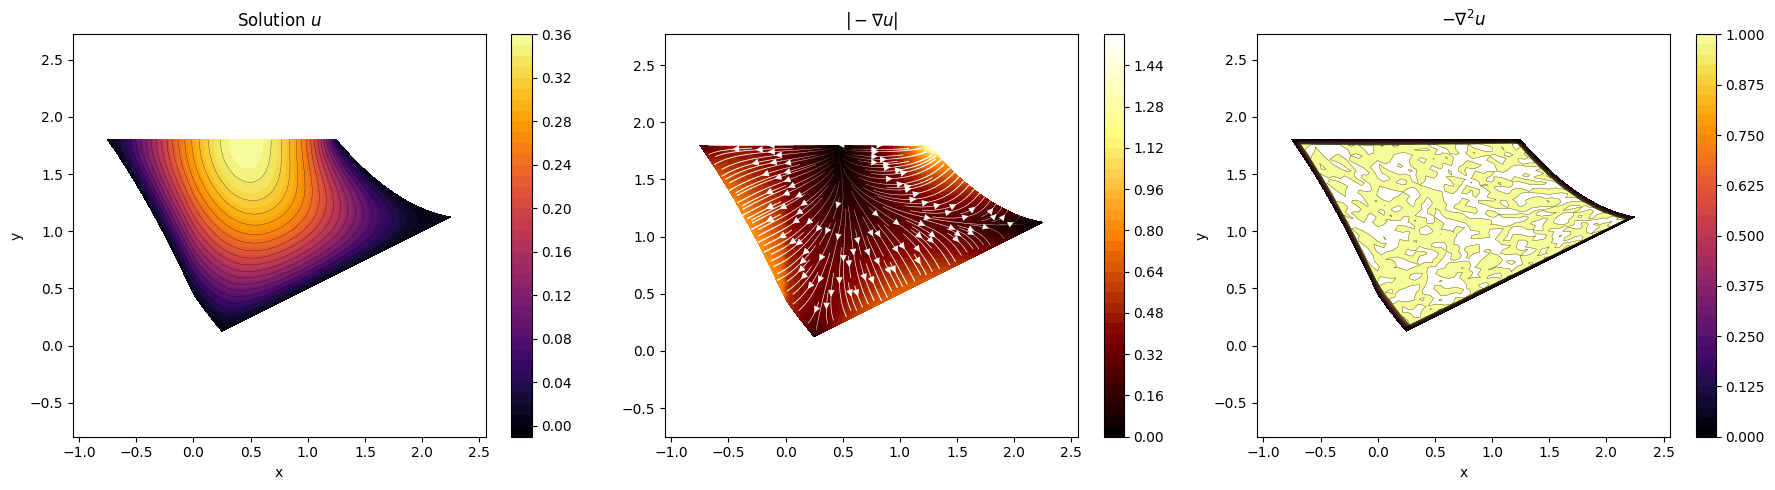

In [13]:
import sympy
from poisson_transform import Transformation, solve_and_plot, plotGeometry
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    return 1
def g(x, y, ksi, eta):
    """Returns (a, b, g) for the boundary condition a*u + b*∂u/∂n = g on ∂Ω and (1, 0, g) for dirichlet conditions inside the domain)"""
    if eta == 1:  # top, neumann = 0
        return (0, 1, 0)
    if ksi == 0:  # left, dirichlet = 0
        return (1, 0, 0)
    if ksi == 1:  # right, dirichlet = 0
        return (1, 0, 0)
    if eta == 0:  # bottom, dirichlet = 0
        return (1, 0, 0)

ksi, eta = Transformation.get_ksi_eta()
Tx = (2*ksi+0.25-eta)
bottom_curve = 0.5*sympy.Abs(Tx+1e-6)  # add 1e-6 to avoid derivative at kink
Ty = bottom_curve + (1.8 - bottom_curve)*eta
plotGeometry(38, 38, Transformation(ksi, eta, Tx, Ty))
solve_and_plot(Nx=38, Ny=38, transformation=Transformation(ksi, eta, Tx, Ty), f=f, g=g)

19:36:12 Integral: 0.06464775169432217


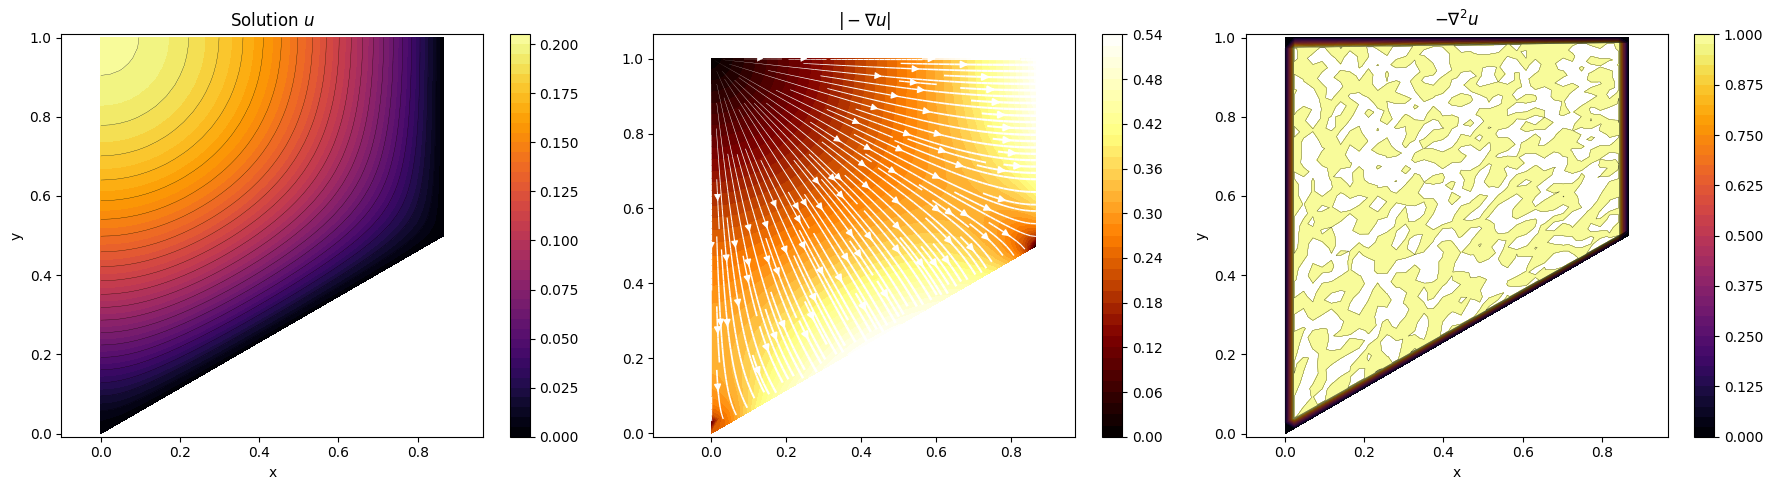

In [14]:
import importlib
import poisson_transform
importlib.reload(poisson_transform)
import sympy
from poisson_transform import Transformation, solve_and_plot, plotGeometry
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    return 1
def g(x, y, ksi, eta):
    """Returns (a, b, g) for the boundary condition a*u + b*∂u/∂n = g on ∂Ω and (1, 0, g) for dirichlet conditions inside the domain)"""
    if eta == 1:  # top, neumann = 0
        return (0, 1, 0)
    if ksi == 0:  # left, neumann = 0
        return (0, 1, 0)
    if ksi == 1:  # right, dirichlet = 0
        return (1, 0, 0)
    if eta == 0:  # bottom, dirichlet = 0
        return (1, 0, 0)

ll, cc, hh = 3, 0.5, 1
bb = np.sqrt((1/2*ll - hh + cc)**2 - cc**2)
ksi, eta = Transformation.get_ksi_eta()
Tx = ksi*bb
Ty = cc*ksi*(1-eta)+hh*eta
# plotGeometry(21, 21, Transformation(ksi, eta, Tx, Ty))
solve_and_plot(Nx=38, Ny=38, transformation=Transformation(ksi, eta, Tx, Ty), f=f, g=g)

19:36:16 Integral: -29.042871607935275


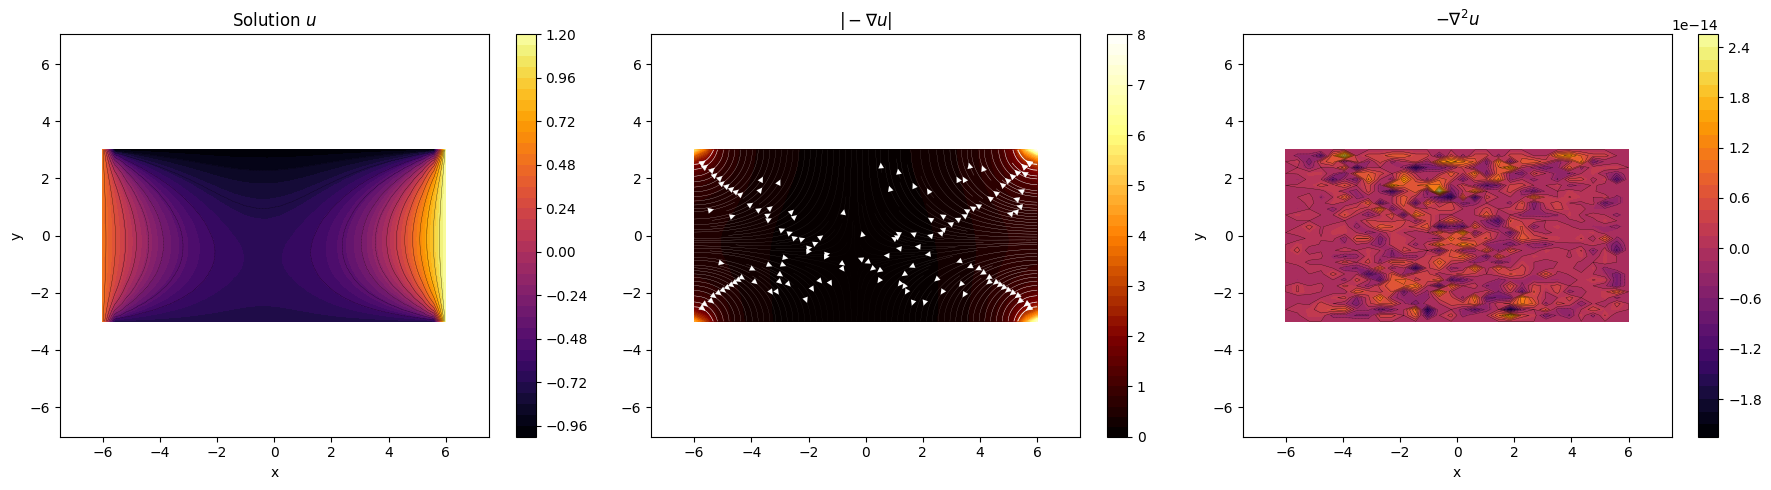

In [15]:
from poisson_transform import Transformation, solve_and_plot
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    return 0
def g(x, y, ksi, eta):
    """Returns (a, b, g) for the boundary condition a*u + b*∂u/∂n = g on ∂Ω and (1, 0, g) for dirichlet conditions inside the domain)"""
    if ksi == 0:  # left, dirichlet = 0.5
        return (1, 0, 0.5)
    if ksi == 1:  # right, dirichlet = 1.2
        return (1, 0, 1.2)
    if eta == 0:  # bottom, dirichlet = -0.75
        return (1, 0, -0.75)
    if eta == 1:  # top, dirichlet = -1
        return (1, 0, -1)

ksi, eta = Transformation.get_ksi_eta()
Tx = 12*ksi - 6
Ty = 6*eta - 3
solve_and_plot(Nx=30, Ny=30, transformation=Transformation(ksi, eta, Tx, Ty), f=f, g=g)

19:36:19 Integral: -11.898317261702779


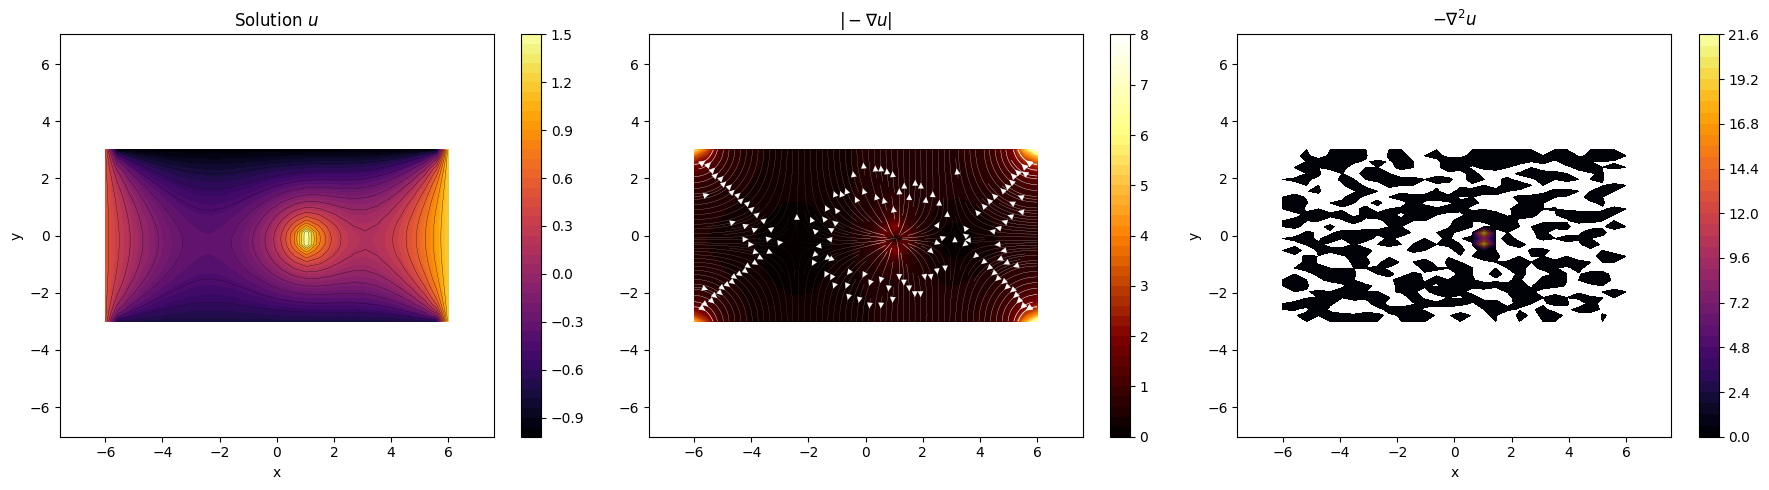

In [16]:
from poisson_transform import Transformation, solve_and_plot
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    return 0
def g(x, y, ksi, eta):
    """Returns (a, b, g) for the boundary condition a*u + b*∂u/∂n = g on ∂Ω and (1, 0, g) for dirichlet conditions inside the domain)"""
    if ksi == 0:  # left, dirichlet = 0.5
        return (1, 0, 0.5)
    if ksi == 1:  # right, dirichlet = 1.2
        return (1, 0, 1.2)
    if eta == 0:  # bottom, dirichlet = -0.75
        return (1, 0, -0.75)
    if eta == 1:  # top, dirichlet = -1
        return (1, 0, -1)

    # dirichlet conditions inside the domain
    if 1 < x < 1.4 and -0.5 < y < 0.2:
        return (1, 0, 1.5)

ksi, eta = Transformation.get_ksi_eta()
Tx = 12*ksi - 6
Ty = 6*eta - 3
solve_and_plot(Nx=30, Ny=30, transformation=Transformation(ksi, eta, Tx, Ty), f=f, g=g)

19:36:25 Integral: 35.2240775563179


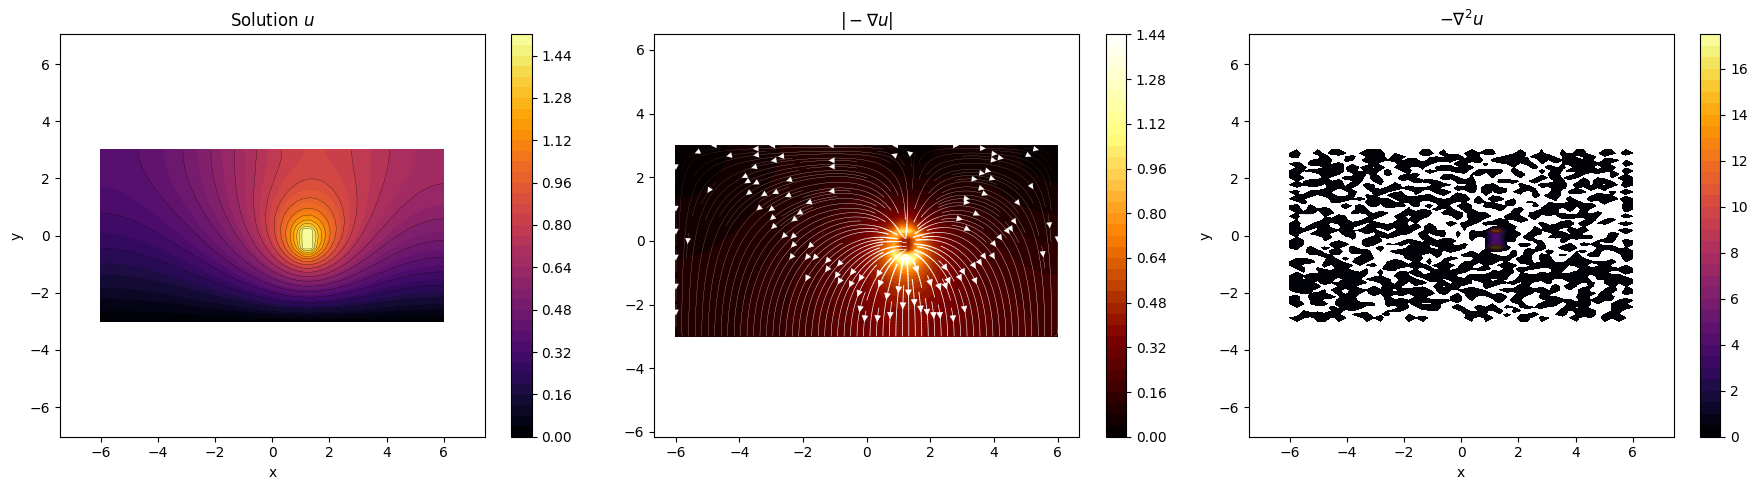

In [17]:
from poisson_transform import Transformation, solve_and_plot
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    return 0
def g(x, y, ksi, eta):
    """Returns (a, b, g) for the boundary condition a*u + b*∂u/∂n = g on ∂Ω and (1, 0, g) for dirichlet conditions inside the domain)"""
    if ksi == 0:  # left, neumann = 0
        return (0, 1, 0)
    if ksi == 1:  # right, neumann = 0
        return (0, 1, 0)
    if eta == 0:  # bottom, dirichlet = 0
        return (1, 0, 0)
    if eta == 1:  # top, neumann = 0
        return (0, 1, 0)

    # dirichlet conditions inside the domain
    if 1 < x < 1.4 and -0.5 < y < 0.2:
        return (1, 0, 1.5)

ksi, eta = Transformation.get_ksi_eta()
Tx = 12*ksi - 6
Ty = 6*eta - 3
solve_and_plot(Nx=50, Ny=50, transformation=Transformation(ksi, eta, Tx, Ty), f=f, g=g)

19:36:33 Integral: 64.89227055928428


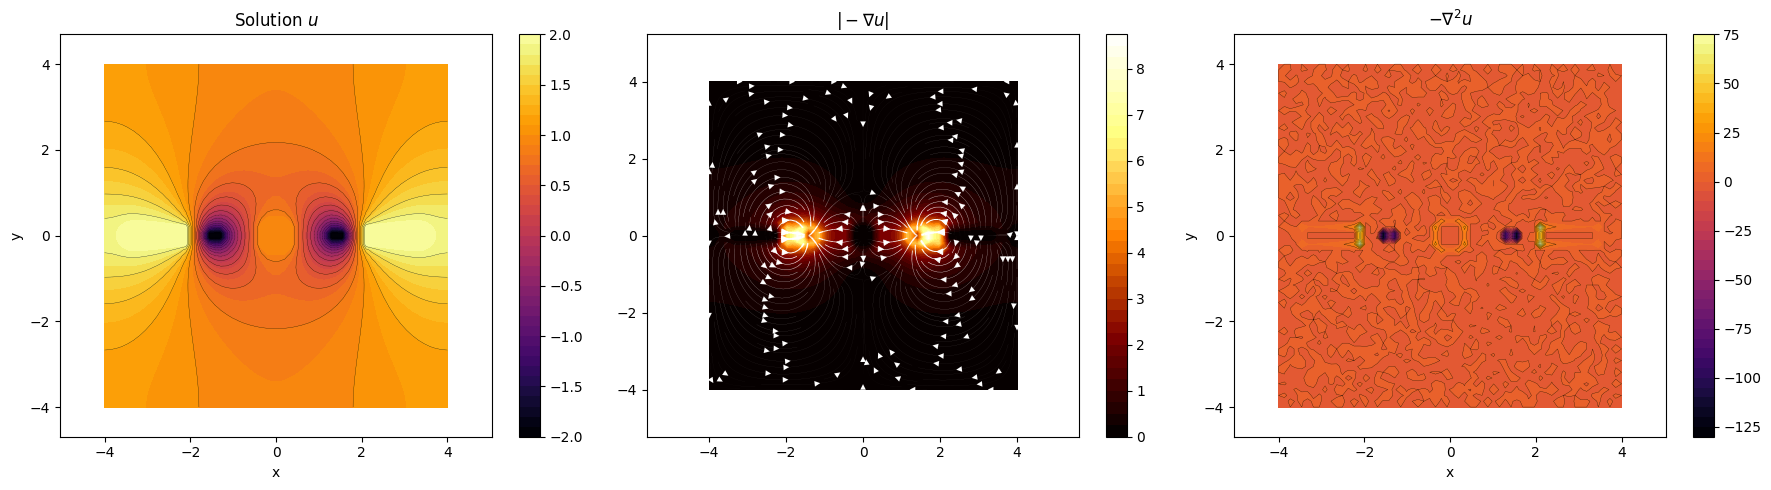

In [18]:
from poisson_transform import Transformation, solve_and_plot
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    return 0
def g(x, y, ksi, eta):
    """Returns (a, b, g) for the boundary condition a*u + b*∂u/∂n = g on ∂Ω and (1, 0, g) for dirichlet conditions inside the domain)"""
    if ksi == 0:  # left, neumann = 0
        return (0, 1, 0)
    if ksi == 1:  # right, neumann = 0
        return (0, 1, 0)
    if eta == 0:  # bottom, neumann = 0
        return (0, 1, 0)
    if eta == 1:  # top, neumann = 0
        return (0, 1, 0)

    # dirichlet conditions inside the domain
    if (x)**2 + (y)**2 < 0.4**2:
        return (1, 0, 1)
    elif (x+1.4)**2 + (y)**2 < 0.2**2:
        return (1, 0, -2)
    elif (x-1.4)**2 + (y)**2 < 0.2**2:
        return (1, 0, -2)
    elif -3.5 < x < -2 and -0.25 < y < 0.25:
        return (1, 0, 2)
    elif 2 < x < 3.5 and -0.25 < y < 0.25:
        return (1, 0, 2)

ksi, eta = Transformation.get_ksi_eta()
Tx = 8*ksi - 4
Ty = 8*eta - 4
solve_and_plot(Nx=60, Ny=60, transformation=Transformation(ksi, eta, Tx, Ty), f=f, g=g)